# **Data Preprocessing**

In [125]:
import pandas as pd
import numpy as np

In [126]:
income_ds = pd.read_csv('/content/Income Dataset (50k).csv')

In [127]:
income_ds.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [128]:
income_ds.shape

(43957, 15)

In [129]:
income_ds.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [130]:
income_subset = income_ds[income_ds['workclass'].notnull()]
df = income_subset[income_subset['occupation'].notnull()]
df.shape

(41451, 15)

In [131]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     724
income_>50K          0
dtype: int64

In [132]:
df = df.fillna(df['native-country'].value_counts().index[0])
df.shape

(41451, 15)

In [133]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [134]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [135]:
print((df['capital-loss'] == 0).sum())
print((df['capital-gain'] == 0).sum())

39471
37979


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41451 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              41451 non-null  int64 
 1   workclass        41451 non-null  object
 2   fnlwgt           41451 non-null  int64 
 3   education        41451 non-null  object
 4   educational-num  41451 non-null  int64 
 5   marital-status   41451 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     41451 non-null  object
 8   race             41451 non-null  object
 9   gender           41451 non-null  object
 10  capital-gain     41451 non-null  int64 
 11  capital-loss     41451 non-null  int64 
 12  hours-per-week   41451 non-null  int64 
 13  native-country   41451 non-null  object
 14  income_>50K      41451 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.1+ MB


In [137]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

for i in categorical_features:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].values)

In [138]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,2,366425,10,16,0,3,1,4,1,99999,0,60,38,1
1,17,2,244602,2,8,4,7,3,4,1,0,0,15,38,0
2,31,2,174201,9,13,2,3,0,4,1,0,0,40,38,1
3,58,5,110199,5,4,2,13,0,4,1,0,0,40,38,0
4,25,5,149248,15,10,4,7,1,2,1,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,2,68982,9,13,2,3,0,4,1,0,0,50,38,1
43953,19,2,116562,11,9,4,7,3,4,0,0,0,40,38,0
43954,30,2,197947,15,10,0,11,1,4,1,0,0,58,38,0
43955,46,2,97883,9,13,4,11,1,4,0,0,0,35,38,0


In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler.fit(X)
X_scaled = scaler.transform(X)

In [140]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Before Dimensionality Reduction**

# **SVC**

In [141]:
from sklearn.svm import SVC
svcModel = SVC(kernel="linear")
svcModel.fit(x_train, y_train)
preSVCTrain = svcModel.score(x_train, y_train)
preSVCTest = svcModel.score(x_test, y_test)

# **Random Forest**

In [142]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
preRFCTrain = rfc.score(x_train, y_train)
preRFCTest = rfc.score(x_test, y_test)

# **MLP Classifier**

In [143]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
preNNCTrain = nnc.score(x_train, y_train)
preNNCTest = nnc.score(x_test, y_test)

## **Dimensionality Reduction**

In [144]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,2,366425,10,16,0,3,1,4,1,99999,0,60,38,1
1,17,2,244602,2,8,4,7,3,4,1,0,0,15,38,0
2,31,2,174201,9,13,2,3,0,4,1,0,0,40,38,1
3,58,5,110199,5,4,2,13,0,4,1,0,0,40,38,0
4,25,5,149248,15,10,4,7,1,2,1,0,0,40,38,0


In [145]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_pca= pd.DataFrame(scaler.fit_transform(df))
df_pca=df_pca.assign(target=y)
df_pca.dropna(inplace=True)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,0.684932,0.333333,0.238967,0.666667,1.000000,0.000000,0.230769,0.2,1.0,1.0,1.0,0.0,0.602041,0.95,1.0,1.0
1,0.000000,0.333333,0.156482,0.133333,0.466667,0.666667,0.538462,0.6,1.0,1.0,0.0,0.0,0.142857,0.95,0.0,0.0
2,0.191781,0.333333,0.108814,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.397959,0.95,1.0,1.0
3,0.561644,0.833333,0.065479,0.333333,0.200000,0.333333,1.000000,0.0,1.0,1.0,0.0,0.0,0.397959,0.95,0.0,0.0
4,0.109589,0.833333,0.091919,1.000000,0.600000,0.666667,0.538462,0.2,0.5,1.0,0.0,0.0,0.397959,0.95,0.0,0.0


In [146]:
from sklearn.decomposition import PCA
dim_red=PCA(n_components=8) # as previously features columns were 15
pc=dim_red.fit_transform(scaler.fit_transform(df_pca))
p_hdc = pd.DataFrame(data=pc, columns=["pc1", "pc2","pc3","pc4","pc5","pc6","pc7","pc8"])
m_hdc=pd.concat([p_hdc, df_pca[["target"]]], axis=1)
m_hdc.dropna(inplace=True)
m_hdc.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,target
0,-0.755191,0.739145,0.642085,-0.296107,-0.036354,0.201639,0.264117,-0.019468,1.0
1,0.090279,-0.238601,-0.461376,0.156665,0.645246,-0.178029,0.154156,-0.206080,0.0
2,-0.714944,0.747820,0.458248,-0.252484,0.150538,-0.039631,-0.063978,-0.064103,1.0
3,-0.296442,-0.230356,-0.479014,0.515054,0.185471,0.452747,-0.042578,-0.059436,0.0
4,-0.116284,-0.238346,-0.393781,0.088573,-0.219863,-0.399004,-0.018348,0.359850,0.0


## **After PCA Dimension Reduction**

In [147]:
X = m_hdc.iloc[:, :-1]
y = m_hdc.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **SVC**

In [148]:
from sklearn.svm import SVC
svcModel = SVC(kernel="linear")
svcModel.fit(x_train, y_train)
postSVCTrain = svcModel.score(x_train, y_train)
postSVCTest = svcModel.score(x_test, y_test)

# **Random Forest**

In [149]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
postRFCTrain = rfc.score(x_train, y_train)
postRFCTest = rfc.score(x_test, y_test)

# **MLP Classifier**

In [150]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
postNNCTrain = nnc.score(x_train, y_train)
postNNCTest = nnc.score(x_test, y_test)

# **Comaparison(s) using Bar Chart**

In [151]:
import matplotlib.pyplot as plt

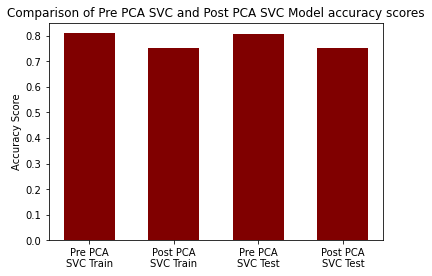

In [152]:
data = {'Pre PCA\nSVC Train':preSVCTrain,  'Post PCA\nSVC Train':postSVCTrain,'Pre PCA\nSVC Test':preSVCTest, 'Post PCA\nSVC Test':postSVCTest}
plt.bar(list(data.keys()),list(data.values()),color='maroon', width=0.6)

plt.ylabel("Accuracy Score")
plt.title("Comparison of Pre PCA SVC and Post PCA SVC Model accuracy scores")
plt.show()

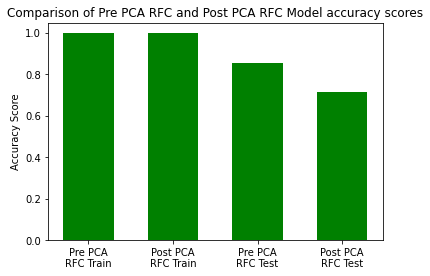

In [153]:
data = {'Pre PCA\nRFC Train':preRFCTrain,  'Post PCA\nRFC Train':postRFCTrain,'Pre PCA\nRFC Test':preRFCTest, 'Post PCA\nRFC Test':postRFCTest}
plt.bar(list(data.keys()),list(data.values()),color='green', width=0.6)

plt.ylabel("Accuracy Score")
plt.title("Comparison of Pre PCA RFC and Post PCA RFC Model accuracy scores")
plt.show()

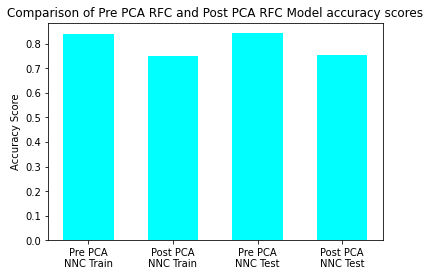

In [154]:
data = {'Pre PCA\nNNC Train':preNNCTrain,  'Post PCA\nNNC Train':postNNCTrain,'Pre PCA\nNNC Test':preNNCTest, 'Post PCA\nNNC Test':postNNCTest}
plt.bar(list(data.keys()),list(data.values()),color='cyan', width=0.6)

plt.ylabel("Accuracy Score")
plt.title("Comparison of Pre PCA RFC and Post PCA RFC Model accuracy scores")
plt.show()